In [1]:
# Load package
using Pkg;
using Distributions, Statistics, LinearAlgebra
using Plots

## Define the economy
Population size: 2500 <br />
Mean income (in USD, thousands): 50 <br />
Standard deviation of income (in USD, thousands): 12.5<br />
The population wealth is initially normally distributed<br />


In [4]:
# Define population, N()
n_pop = 2_500; # Population size
n_iter = 5000; # Iteration of collision

In [2]:
# Distribution of income
μ_income = 50_000; # Mean income
σ_income = 12_000; # Standard deviation of income
𝐃 = Normal(μ_income, σ_income)

Normal{Float64}(μ=50000.0, σ=12000.0)

In case of random proportional wealth redistribution, we use random uniform distribution

In [5]:
# Decider for selecting two agents to collide
𝐔 = Uniform(1, n_pop)

Uniform{Float64}(a=1.0, b=2500.0)

We test two scenarios, <br />
(1) Equal wealth redistribution: when the two agents meet, they pull their wealth and split equally (50%) <br />
(2) Random wealth split: when the two agents meet, they pull their wealth and random-uniformly split the wealth (0 - 100%)

In [6]:
# vector of initial income of individual
val_inc_ini = deepcopy(rand(𝐃, n_pop));
# Equal splits
val_inc_trc = zeros(n_pop, n_iter); # Trace the changes in distribuiton
val_inc_trc[:,1] = val_inc_ini; # the very first distributional look
# Uniform random split
val_inc_trc_rand = zeros(n_pop, n_iter); # Trace the changes in distribuiton
val_inc_trc_rand[:,1] = val_inc_ini; # the very first distributional look

Run the scenarios

In [7]:

# Agent collide-split economy: two agents meet at a time, their wealth is equally distributed

for iter ∈ 2:n_iter
    # initialize the starting wealth distributio of the period
    val_inc_trc[:, iter] = val_inc_trc[:, (iter - 1)];
    # For each iteration, we select two agents who will collide
    agt_1, agt_2 = sample(1:n_pop, 2; replace = false)
    # collect their financial values
    val_inc_agt_1, val_inc_agt_2 = val_inc_trc[agt_1, iter], val_inc_trc[agt_2, iter];
    # divide up their wealth equally, and save
    val_inc_distributed = mean([val_inc_agt_1, val_inc_agt_2]);
    val_inc_trc[agt_1, iter] = val_inc_distributed;
    val_inc_trc[agt_2, iter] = val_inc_distributed;

    # Iteration 2 - uniform wealth redistribution, ranom split =========================
    # initialize the starting wealth distributio of the period
    val_inc_trc_rand[:, iter] = val_inc_trc_rand[:, (iter - 1)];
    # For each iteration, we select two agents who will collide
    agt_1, agt_2 = sample(1:n_pop, 2; replace = false)
    # collect their financial values
    total_wealth = val_inc_trc_rand[agt_1, iter] + val_inc_trc_rand[agt_2, iter];
    # How to split the wealth ..........................................................
    ρ = rand(1)[1]; #proportion to be split`
    # Redistribute wealth
    #   because of randomization, no need for random in order,
    val_inc_agt_1, val_inc_agt_2 = total_wealth * ρ, total_wealth * (1 - ρ)
    val_inc_trc_rand[agt_1, iter] = val_inc_agt_1;
    val_inc_trc_rand[agt_2, iter] = val_inc_agt_2;
end

For the rule of equal split,

With more transactions, there will be more people with equal and leveled wealth. As the collision count goes $\infty$, the distribution will become narrower to the mean value of the original wealth distribution.

Mean - true: 50000; std - true: 12000
Mean: 50227.38157018873; std: 4273.63120049074


┌ Info: Saved animation to 
│   fn = C:\Users\justin_lee\Quadratic Dropbox\Justin Lee\github\simulation-discrete\exercise\simple_collision_wealth_redistribution\tmp.gif
└ @ Plots C:\Users\justin_lee\.julia\packages\Plots\HcxwM\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\justin_lee\\Quadratic Dropbox\\Justin Lee\\github\\simulation-discrete\\exercise\\simple_collision_wealth_redistribution\\tmp.gif")
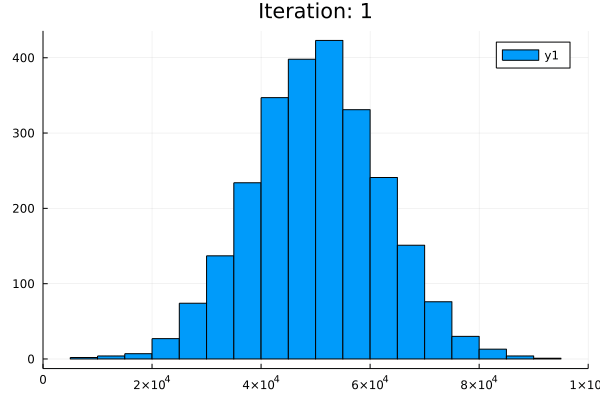

In [17]:
println("Mean - true: $(μ_income); std - true: $(σ_income)")
println("Mean: $(mean(val_inc_trc[:,end])); std: $(std(val_inc_trc[:,end]))")
@gif for i ∈ 1:10:n_iter
    histogram(val_inc_trc[:,i], title = "Iteration: $(i)", xlims = (0,1e5))
end every 5

For the rule of random split,

With the probability/proportion of wage split is uniform, an agent have equal chance of walking out richer (poorer) than the other agent.

If we set up an expectation: (proportion of wealth to be taken from a pool) * (total wealth collected from the pool), we would expect a polarizing final results, more will walk out with smaller amount of money, with total expected share being an average. There will be very few, who would start with large sums of money - and the wealth in very few occasions will grow and be kept with fewer people.


Mean - true: 50000; std - true: 12000
Mean: 50227.38157018873; std: 42845.770082342555


┌ Info: Saved animation to 
│   fn = C:\Users\justin_lee\Quadratic Dropbox\Justin Lee\github\simulation-discrete\exercise\simple_collision_wealth_redistribution\tmp.gif
└ @ Plots C:\Users\justin_lee\.julia\packages\Plots\HcxwM\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\justin_lee\\Quadratic Dropbox\\Justin Lee\\github\\simulation-discrete\\exercise\\simple_collision_wealth_redistribution\\tmp.gif")
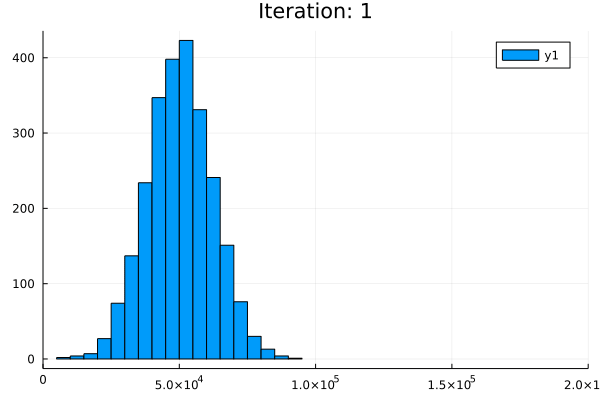

In [22]:
println("Mean - true: $(μ_income); std - true: $(σ_income)")
println("Mean: $(mean(val_inc_trc_rand[:,end])); std: $(std(val_inc_trc_rand[:,end]))")
@gif for i ∈ 1:10:n_iter
    histogram(val_inc_trc_rand[:,i], title = "Iteration: $(i)", xlims = (0,2e5))
end every 5